<a href="https://colab.research.google.com/github/Kokkulayashmi/LGMVIP-DataScience/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import pandas as pd
import numpy as np
import math 
warnings.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
a=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stockmarket.csv")

In [8]:
a=a.replace('[^\d.]','',regex=True).astype(float)

In [9]:
a

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,20180928.0,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
1,20180927.0,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
2,20180926.0,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
3,20180925.0,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
4,20180924.0,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55
...,...,...,...,...,...,...,...,...
2030,20100727.0,117.60,119.50,112.00,118.80,118.65,586100.0,694.98
2031,20100726.0,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2032,20100723.0,121.80,121.95,120.25,120.35,120.65,281312.0,340.31
2033,20100722.0,120.30,122.00,120.25,120.75,120.90,293312.0,355.17


In [10]:
a.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,20180928.0,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
1,20180927.0,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
2,20180926.0,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
3,20180925.0,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
4,20180924.0,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


In [11]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   float64
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   float64
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(8)
memory usage: 127.3 KB


In [12]:
a.describe()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2.035000e+03,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,2.014201e+07,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,2.394201e+04,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,2.010072e+07,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,2.012073e+07,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,2.014081e+07,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,2.016091e+07,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,2.018093e+07,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [13]:
a['Date'] = pd.to_datetime(a['Date'])
a.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity           float64
Turnover (Lacs)                float64
dtype: object

In [14]:
a = a.sort_values('Date')
a.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,1970-01-01 00:00:00.020100721,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2033,1970-01-01 00:00:00.020100722,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2032,1970-01-01 00:00:00.020100723,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2031,1970-01-01 00:00:00.020100726,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2030,1970-01-01 00:00:00.020100727,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


Text(0, 0.5, 'Close')

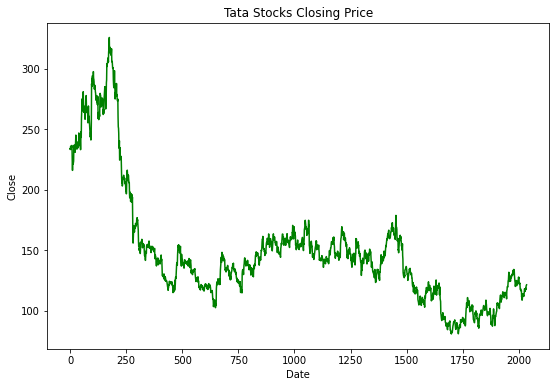

In [15]:
plt.figure(figsize = (9,6))
plt.title('Tata Stocks Closing Price')
plt.plot(a['Close'],'g')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close',fontsize=10)

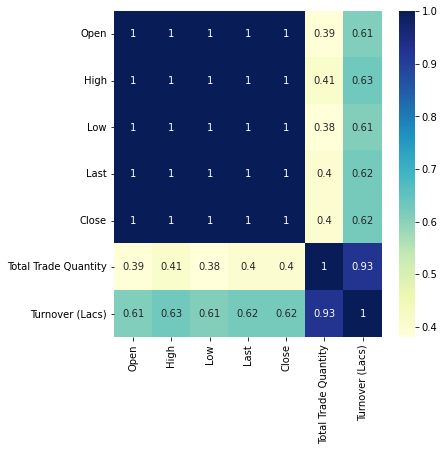

In [17]:
dcorr = a.corr()
top_corr_features = dcorr.index
plt.figure(figsize=(6,6))
sns.heatmap(a[top_corr_features].corr(), annot=True, cmap="YlGnBu")

**MinMaxScaler**

In [18]:
data_close = a.reset_index()['Close']
data_close.head()
scaler = MinMaxScaler(feature_range = (0, 1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))

**Splitting train, Test data**


In [19]:
train_size = int(len(data_close)*0.70)
test_size = len(data_close) - train_size
train, test = data_close[0 : train_size, :], data_close[train_size : len(data_close), :1]

In [20]:
def create_matrix(ds, time_step=1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [21]:
step=100 
X_train, y_train = create_matrix(train, step)
X_test, y_test = create_matrix(test, step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1323, 100) (1323,)
(510, 100) (510,)


In [22]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**LSTM Model**

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=77, batch_size=64, verbose=1, shuffle=True).history

Epoch 1/77
19/19 [==============================] - 11s 264ms/step - loss: 0.0104 - val_loss: 0.0015
Epoch 2/77
19/19 [==============================] - 3s 183ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 3/77
19/19 [==============================] - 3s 179ms/step - loss: 9.7502e-04 - val_loss: 0.0013
Epoch 4/77
19/19 [==============================] - 4s 225ms/step - loss: 8.8517e-04 - val_loss: 0.0012
Epoch 5/77
19/19 [==============================] - 3s 178ms/step - loss: 8.5753e-04 - val_loss: 0.0011
Epoch 6/77
19/19 [==============================] - 3s 180ms/step - loss: 8.6430e-04 - val_loss: 0.0014
Epoch 7/77
19/19 [==============================] - 3s 180ms/step - loss: 8.4884e-04 - val_loss: 0.0011
Epoch 8/77
19/19 [==============================] - 3s 180ms/step - loss: 8.2003e-04 - val_loss: 0.0011
Epoch 9/77
19/19 [==============================] - 3s 178ms/step - loss: 7.6939e-04 - val_loss: 0.0010
Epoch 10/77
19/19 [==============================] - 3s 180ms/step - lo

In [26]:

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 35ms/step


In [27]:
# Reversing the MinMax Scaler
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
math.sqrt(mean_squared_error(y_train, train_predict))
math.sqrt(mean_squared_error(y_test,test_predict))

208.50484393230576

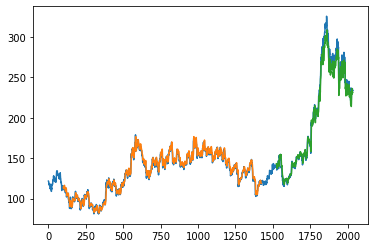

In [29]:
### Visualise the Predictions
look_back = 100
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

In [30]:
### Future Prediction Model
x_inum_pyut=test[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()

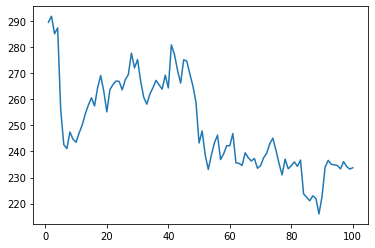

In [31]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
plt.plot(day_new, scaler.inverse_transform(data_close[1935 : ]))